In [17]:
import numpy as np

In [ ]:
def smooth(A:np.ndarray, smoothing_length:int = 20)->np.ndarray:  ###smoothing some outputs
    K = []
    N = len(A)
    for i in range(5, N-5):
        K.append(np.mean(A[i-5:i+5]))
    return K

In [123]:
import gymnasium as gy
env = gym.make("FrozenLake-v1", render_mode="human")

In [410]:
class agent:
    def __init__(self, env, α = 0.2, γ = 0.7, ϵ = 0.9):
        self.env = env
        self.Q = np.zeros((self.env.observation_space.n, self.env.action_space.n))
        self.alpha = α
        self.gamma = γ
        self.epsilon = ϵ
        self.current_state = 0
        self.terminal_state = False
        self.reward = 0
        ## the following dude is for containing rewards to be used in episoded ##
        self.counter = 0
        self.container = []
        self.container_ = []
    def update(self, action, state, reward):
        max_term = self.Q.max(-1)[state]
        self.Q[self.current_state, action] += self.alpha*(reward + self.gamma*(max_term)
                                                          -  self.Q[self.current_state, action])
        self.current_state = state
        self.reward += reward
        self.counter += 1
    def greedy_action(self, state):
        return np.argmax(self.Q, axis = -1)[state]    
    def take_action(self, state = None):
        if state == None:
            return env.action_space.sample()
        choice = np.random.rand()
        if choice < self.epsilon:
            action = env.action_space.sample()
        else:
            action = self.greedy_action(state)
        ## To be filleed###
        return action
    def reset(self):
        self.container.append(self.reward)
        self.container_.append(self.counter)
        ## -- ##
        self.counter = 0
        self.reward = 0
        self.current_state = 0


In [438]:
env = gym.make("FrozenLake-v1",)
agent_ = agent(env, ϵ = 0.5, γ = 0.6, α = 0.8)
env.reset()

(0, {'prob': 1})

In [ ]:
### One episode
from tqdm import tqdm
for i in tqdm(range(1000000)):
    while True:
        action = agent_.take_action(agent_.current_state)
        next_state, reward, terminated, truncated, info = env.step(action)
        if next_state in [5, 7, 11, 12]:
            reward = -100
        elif next_state == 15:
            reward = 500
        else:
            reward = 1
        agent_.update(action, next_state, reward)

        if terminated or truncated:
            agent_.reset()
            observation, info = env.reset()
            break
        if i % 20 == 0:
            agent_.epsilon /= 1.00001
        

 29%|█████████████████████                                                   | 292975/1000000 [04:00<26:10, 450.15it/s]

In [430]:
np.array(agent_.Q, dtype = np.float16) ## This dude is the Q function

array([[ 34.97 ,  34.47 ,  35.8  ,  35.97 ],
       [-99.8  ,  19.5  ,  22.8  ,  34.2  ],
       [-37.38 ,  24.39 ,  12.375,  24.52 ],
       [ 21.67 , -75.56 , -76.06 ,  20.75 ],
       [ 34.16 , -92.44 , -94.94 , -94.8  ],
       [  0.   ,   0.   ,   0.   ,   0.   ],
       [-66.4  , -69.75 , -91.4  , -96.2  ],
       [  0.   ,   0.   ,   0.   ,   0.   ],
       [-68.   ,  23.86 , -70.9  ,  37.56 ],
       [150.4  ,  52.12 , -62.88 , -65.7  ],
       [ 61.56 , -40.12 , -96.56 ,  64.06 ],
       [  0.   ,   0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ,   0.   ],
       [-44.8  , -20.7  , 157.   , -15.94 ],
       [ 69.4  , 228.1  , 204.8  , 209.6  ],
       [  0.   ,   0.   ,   0.   ,   0.   ]], dtype=float16)

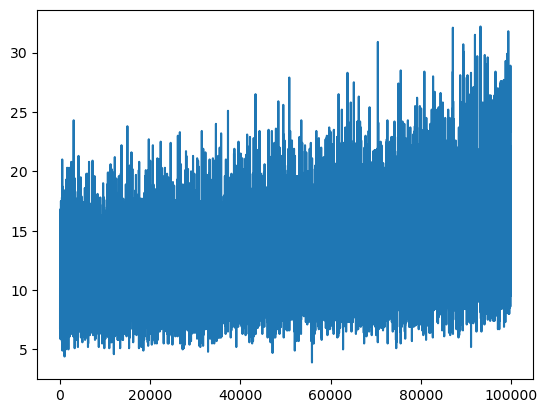

In [437]:
from matplotlib import pyplot as plt
plt.plot(smooth(agent_.container_, 20)) ## Our yerli ve milli agent seems pretty cumbersome ha?